- id
- host_id
- host_name
- host_since
- host_location
- host_response_time
- host_response_rate
- host_is_superhost
- host_neighbourhood
- host_verifications
- host_has_profile_pic
- host_identity_verified
- latitude
- longitude
- is_location_exact
- property_type
- room_type
- accommodates
- bathrooms
- bedrooms
- beds
- bed_type
- amenities
- price
- security_deposit
- cleaning_fee
- guests_included
- extra_people
- maximum_maximum_nights
- number_of_reviews
- instant_bookable
- cancellation_policy
- require_guest_profile_picture
- require_guest_phone_verifications

- availability_30
- availability_60
- availability_365
- review_scores_rating
- review_scores_accuracy
- review_scores_value
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms    
- calculated_host_listings_count_shared_rooms

## Sanfransisco AirBnb listings

text

text

text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import bamboolib as bb

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('listings.csv')

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190708031549,2019-07-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.60
1,3850,https://www.airbnb.com/rooms/3850,20190708031549,2019-07-08,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.04
2,5858,https://www.airbnb.com/rooms/5858,20190708031549,2019-07-08,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
3,7918,https://www.airbnb.com/rooms/7918,20190708031549,2019-07-08,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8142,https://www.airbnb.com/rooms/8142,20190708031549,2019-07-08,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14


In [4]:
data.shape

(7738, 106)

In [5]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [6]:
# null values in each column
values = data.columns
for i in values:
    print(f'number of null values for \033[95m{i}\033[0m: {((data[i].isna().sum()/data.shape[0]).round(2)*100)>50}')

number of null values for id: False
number of null values for listing_url: False
number of null values for scrape_id: False
number of null values for last_scraped: False
number of null values for name: False
number of null values for summary: False
number of null values for space: False
number of null values for description: False
number of null values for experiences_offered: False
number of null values for neighborhood_overview: False
number of null values for notes: False
number of null values for transit: False
number of null values for access: False
number of null values for interaction: False
number of null values for house_rules: False
number of null values for thumbnail_url: True
number of null values for medium_url: True
number of null values for picture_url: False
number of null values for xl_picture_url: True
number of null values for host_id: False
number of null values for host_url: False
number of null values for host_name: False
number of null values for host_since: Fals

**Note**:-
- after observing we found **thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price** has more than 50% missing values, hence drop them.

In [7]:
columns = ['thumbnail_url','medium_url','xl_picture_url','neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price']

data = data.drop(columns, axis = 1)

Now, Columns with morethan 50% are missing.

In [8]:
#check for duplicates
data.duplicated().sum()

0

So we have no null values

In [9]:
#unique values in all columns
values = data.columns
for i in values:
    print(f'number of unique values for \033[94m{i}\033[0m: {data[i].nunique()}')


number of unique values for id: 7738
number of unique values for listing_url: 7738
number of unique values for scrape_id: 1
number of unique values for last_scraped: 1
number of unique values for name: 7486
number of unique values for summary: 6401
number of unique values for space: 5481
number of unique values for description: 7015
number of unique values for experiences_offered: 1
number of unique values for neighborhood_overview: 4388
number of unique values for notes: 3608
number of unique values for transit: 4358
number of unique values for access: 4258
number of unique values for interaction: 3995
number of unique values for house_rules: 4390
number of unique values for picture_url: 7457
number of unique values for host_id: 4200
number of unique values for host_url: 4200
number of unique values for host_name: 2131
number of unique values for host_since: 2269
number of unique values for host_location: 171
number of unique values for host_about: 3076
number of unique values for hos

In [10]:
data.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.738000e+03,7.738000e+03,7.738000e+03,0.0,7736.000000,7736.000000,7738.000000,7738.000000,7738.000000,7720.000000,...,6114.000000,6112.000000,6115.000000,6112.000000,6112.000000,7738.000000,7738.000000,7738.000000,7738.000000,6165.00000
mean,1.868475e+07,2.019071e+13,5.442105e+07,NaN,72.953852,72.953852,37.766045,-122.430242,3.204187,1.371438,...,9.629866,9.856348,9.839738,9.682919,9.410831,21.197209,17.781080,2.872060,0.544068,1.86644
std,1.145804e+07,0.000000e+00,7.139031e+07,NaN,249.841676,249.841676,0.022681,0.026841,1.921471,0.862045,...,0.783791,0.551381,0.588982,0.713557,0.803303,52.929449,51.918137,6.504205,2.999235,2.04749
min,9.580000e+02,2.019071e+13,4.600000e+01,NaN,0.000000,0.000000,37.704870,-122.513060,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,7.991781e+06,2.019071e+13,4.184590e+06,NaN,1.000000,1.000000,37.751443,-122.442725,2.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.31000
50%,2.026853e+07,2.019071e+13,2.014508e+07,NaN,2.000000,2.000000,37.768475,-122.424745,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.04000
75%,2.929977e+07,2.019071e+13,8.331836e+07,NaN,10.000000,10.000000,37.785520,-122.410820,4.000000,1.500000,...,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,2.000000,2.000000,0.000000,2.84000
max,3.648198e+07,2.019071e+13,2.738296e+08,NaN,1297.000000,1297.000000,37.810310,-122.368570,16.000000,14.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,249.000000,249.000000,43.000000,25.000000,14.43000


In [11]:
import pandas_profiling as pp

pp.ProfileReport(data)

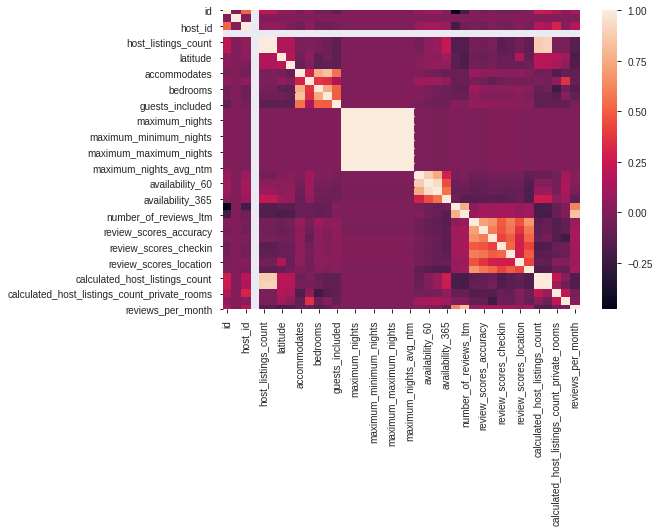

In [12]:
sns.heatmap(data.corr())

from the Heat map we can understand that we have high correlation between variables
- host_listings_count vs calculated_host_listings_count_entire_homes.
- host_total_listings_count vs host_listings_count.
- maximum_minimum_nights vs maximum_maximum_nights.
- maximum_nights vs maximum_minimum_nights.
- maximum_nights_avg_ntm vs maximum_nights.
- minimum_maximum_nights vs maximum_nights_avg_ntm.
- minimum_minimum_nights vs minimum_maximum_nights.
- minimum_nights vs minimum_minimum_nights.
- minimum_nights_avg_ntm minimum_nights.

drop one in the two variables.


remove urls

In [13]:
columns = ['host_listings_count','host_total_listings_count','maximum_minimum_nights','maximum_nights','maximum_nights_avg_ntm','minimum_maximum_nights','minimum_minimum_nights','minimum_nights','minimum_nights_avg_ntm']

data = data.drop(columns,axis = 1)

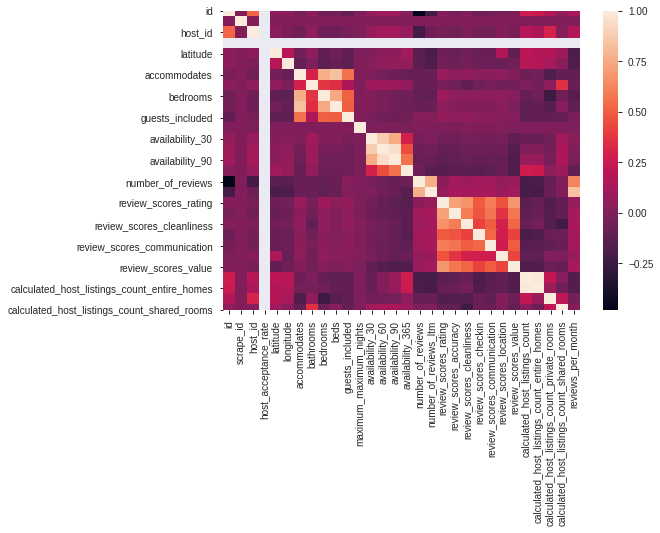

In [14]:
sns.heatmap(data.corr())

columns that are not useful

In [15]:
columns = ['picture_url','host_url','host_thumbnail_url','host_picture_url','listing_url', 'scrape_id','last_scraped','experiences_offered','calendar_last_scraped','country','country_code','experiences_offered','has_availability','is_business_travel_ready']

data = data.drop(columns,axis= 1)

In [16]:
data.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_r

In [17]:
data.shape

(7738, 77)

columns that are not useful are removed.

In [18]:
columns = ['first_review','last_review','number_of_reviews_ltm','license','reviews_per_month','market','access','jurisdiction_names','summary','street','name','space','description', 'neighborhood_overview','notes','transit','city','state','zipcode','smart_location','calendar_updated','requires_license','interaction','house_rules','host_about']

data = data.drop(columns,axis = 1)

Removing columns that are not making any sense

In [19]:
columns = ['neighbourhood','neighbourhood_cleansed','review_scores_cleanliness','review_scores_checkin','review_scores_communication','calculated_host_listings_count','availability_90','host_acceptance_rate','review_scores_location']

data = data.drop(columns,axis = 1)

In [20]:
data.shape

(7738, 43)

In [21]:
data.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_maximum_nights', 'availability_30', 'availability_60',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype=

In [22]:
data.isna().sum()

id                                                 0
host_id                                            0
host_name                                          2
host_since                                         2
host_location                                      6
host_response_time                               778
host_response_rate                               778
host_is_superhost                                  2
host_neighbourhood                               505
host_verifications                                 0
host_has_profile_pic                               2
host_identity_verified                             2
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

In [23]:
data.shape

(7738, 43)

### Data preprocessing

In [24]:
#hosst_since
data['host_since'] = pd.to_datetime(data['host_since'])

In [25]:
##host response time
hostresponsetimes = pd.get_dummies(data['host_response_time'])

In [26]:
data['host_response_time'].value_counts()

within an hour        4199
within a few hours    1946
within a day           735
a few days or more      80
Name: host_response_time, dtype: int64

In [27]:
data['host_response_time'] = data['host_response_time'].fillna('within an hour')

In [28]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['host_response_rate'] = data['host_response_rate'].str.replace('%','')

#replacing dollar
col = ['price','security_deposit','cleaning_fee','extra_people','host_response_rate']
for i in col:
    data[i] = data[i].str.replace('$','')
    data[i] = data[i].str.replace(',','')
    data[i] = data[i].astype(float)
    
#converte bool type columns to int type
col1 = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for i in col1:
    data[i] = pd.get_dummies(data[i])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 43 columns):
id                                              7738 non-null int64
host_id                                         7738 non-null int64
host_name                                       7736 non-null object
host_since                                      7736 non-null datetime64[ns]
host_location                                   7732 non-null object
host_response_time                              7738 non-null object
host_response_rate                              6960 non-null float64
host_is_superhost                               7738 non-null uint8
host_neighbourhood                              7233 non-null object
host_verifications                              7738 non-null object
host_has_profile_pic                            7738 non-null uint8
host_identity_verified                          7738 non-null uint8
latitude                                        7738 non-null

In [30]:
data.isna().sum()

id                                                 0
host_id                                            0
host_name                                          2
host_since                                         2
host_location                                      6
host_response_time                                 0
host_response_rate                               778
host_is_superhost                                  0
host_neighbourhood                               505
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

In [31]:
data = data.dropna(subset = ['host_name','host_since','host_location','bathrooms','bedrooms','beds','cancellation_policy'])

In [32]:
data.isna().sum()

id                                                 0
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                      0
host_response_time                                 0
host_response_rate                               772
host_is_superhost                                  0
host_neighbourhood                               501
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

In [33]:
idata = data.copy()

In [34]:
idata['host_response_rate'] = idata['host_response_rate'].fillna(idata['host_response_rate'].median())

In [35]:
idata['security_deposit']=idata['security_deposit'].fillna(idata['security_deposit'].median())

In [36]:
idata['cleaning_fee'] = idata['cleaning_fee'].fillna(idata['cleaning_fee'].median())

In [37]:
idata['review_scores_rating'] = idata['review_scores_rating'].fillna(idata['review_scores_rating'].median())

In [38]:
idata['review_scores_accuracy'] = idata['review_scores_accuracy'].fillna(idata['review_scores_accuracy'].median())

In [39]:
idata['review_scores_value'] = idata['review_scores_value'].fillna(idata['review_scores_value'].median())

In [40]:
idata.isna().sum()

id                                                0
host_id                                           0
host_name                                         0
host_since                                        0
host_location                                     0
host_response_time                                0
host_response_rate                                0
host_is_superhost                                 0
host_neighbourhood                              501
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
latitude                                          0
longitude                                         0
is_location_exact                                 0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms                                         0
bedrooms    

In [41]:
idata.shape

(7703, 43)

# EDA

In [42]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

Text(0, 0.5, 'No of times he/she provided Property')

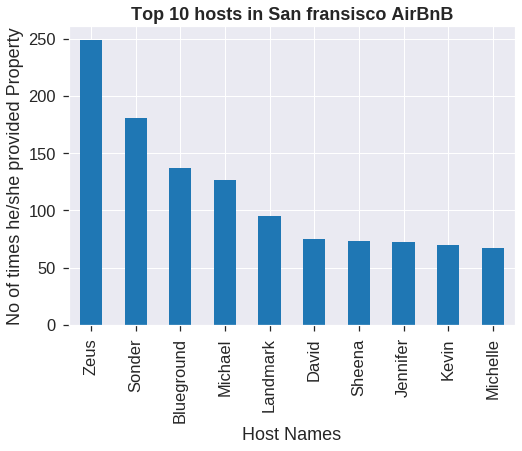

In [43]:
#hostname
idata['host_name'] = idata['host_name'].replace('Sonder (San Francisco)','Sonder')
idata.host_name.value_counts()[:10].plot(kind = 'bar')
plt.title("Top 10 hosts in San fransisco AirBnB",weight = 'bold')
plt.xlabel('Host Names')
plt.ylabel('No of times he/she provided Property')

#### who is the host from the begining?

In [44]:
#host since
idata[['host_name','host_since']][idata['host_since'] == idata['host_since'].min()]

,host_name,host_since
1185,Elizabeth,2008-03-03


In [45]:
data[data['host_since'] == data['host_since'].min()]

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1185,3506164,46,Elizabeth,2008-03-03,"San Francisco, California, United States",within an hour,100.0,0,Noe Valley,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,98.0,10.0,9.0,1,flexible,1,1,1,0,0


**Note**:-
- Elizabeth is the  only host from the begining of **AirBnB** in san fransisco.

#### where do most of the hosts live in?

In [46]:
idata['host_location'] = idata['host_location'].replace('California, United States','Los Angeles, California, United States')


In [47]:
hostlocation = pd.DataFrame(idata['host_location'].value_counts().head(5).reset_index())
##rename
hostlocation['index'] = hostlocation['index'].astype(str).str.replace(", California, United States","")
hostlocation['index'] = hostlocation['index'].astype(str).str.replace(", New York, United States","")

In [48]:
hostlocation

,index,host_location
0,San Francisco,6020
1,US,641
2,New York,186
3,Los Angeles,165
4,San Diego,41


Text(0, 0.5, 'No of Hosts')

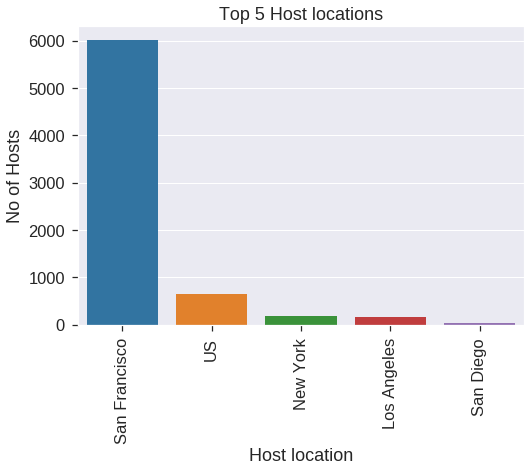

In [49]:
#plt.figure(figsize = (8,6))
sns.barplot(x = hostlocation['index'], y =hostlocation['host_location'],data = hostlocation)
plt.xticks(rotation  =90)
plt.title('Top 5 Host locations')
plt.xlabel('Host location')
plt.ylabel('No of Hosts')

#### How fast host responses?

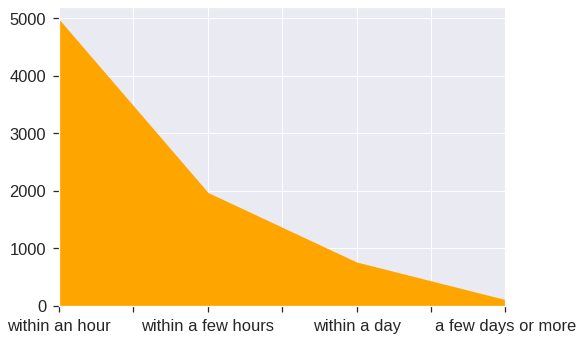

In [50]:
idata['host_response_time'].value_counts().plot(kind = 'area',color = 'orange')

Text(0, 0.5, 'No of Hosts')

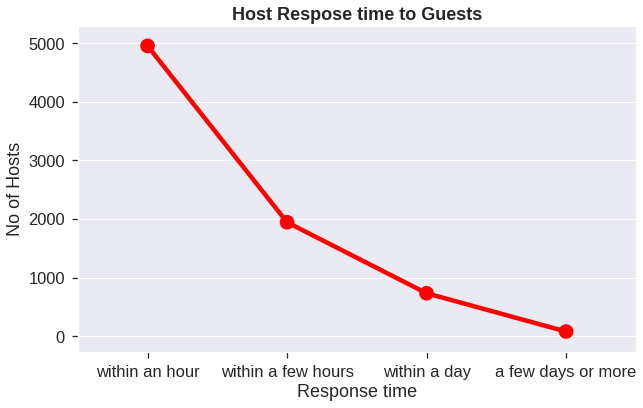

In [51]:
plt.figure(figsize = (10,6))
sns.pointplot(x = idata['host_response_time'].value_counts().index, y =idata['host_response_time'].value_counts().values,color = 'red')
plt.title('Host Respose time to Guests', weight = 'bold')
plt.xlabel('Response time')
plt.ylabel('No of Hosts')

#### How many are the hosts with 100% response rate?

In [52]:
hresponserate = pd.DataFrame(idata['host_response_rate'].value_counts().head().reset_index())

Text(0.5, 1.0, 'Host Response rate vs No of Hosts')

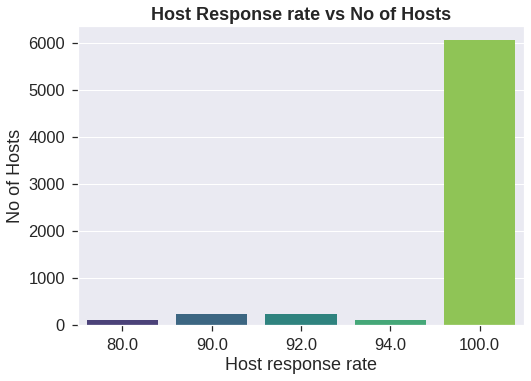

In [53]:
sns.barplot(x = hresponserate['index'],y = hresponserate.host_response_rate,palette = 'viridis')
plt.xlabel("Host response rate")
plt.ylabel('No of Hosts')
plt.title("Host Response rate vs No of Hosts", weight  = 'bold')


#### what is the hosts count with response rate between 80% and 100%?

In [54]:
response80 = idata[idata['host_response_rate'] >= 80.0] 

In [55]:
response80_100 = response80[response80['host_response_rate']<= 100.0]

In [56]:
new = pd.DataFrame({'Responserate': ['Response rate 80 to 100'],'value' : response80_100['host_response_rate'].count()})

In [57]:
new

,Responserate,value
0,Response rate 80 to 100,7324


**so we have 7324 hosts with responserate between 80 and 100.**

#### How many devotedhosts/super hsots we have?

**The four criteria that hosts must meet to become an Airbnb Superhost are:**

- Host a minimum of 10 stays in a year
- Respond to guests quickly and maintain a 90% response rate or higher
- Have at least 80% 5-star reviews
- Honor confirmed reservations (meaning hosts should rarely cancel)

In [58]:
idata['host_is_superhost'] = idata['host_is_superhost'].map({0: 'host', 1: 'superhost'})

Text(0, 0.5, 'Number of hosts')

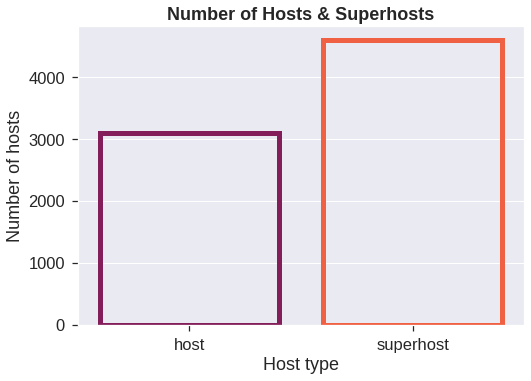

In [59]:
sns.countplot(idata['host_is_superhost'],facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("rocket", 2))
plt.title('Number of Hosts & Superhosts', weight = 'bold')
plt.xlabel('Host type')
plt.ylabel('Number of hosts')

##### Top10 neighbourhoods of host

In [60]:
host_nlocation = pd.DataFrame(idata['host_neighbourhood'].value_counts().head(20).reset_index())

Text(0.5, 1.0, 'Top 10 Hosts Neighbourhood Location')

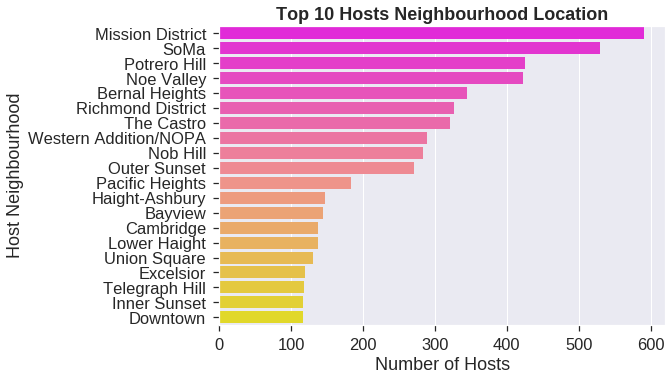

In [61]:
sns.barplot(x = host_nlocation['host_neighbourhood'],y = host_nlocation['index'],data = host_nlocation,palette = 'spring')
plt.xlabel('Number of Hosts')
plt.ylabel('Host Neighbourhood')
plt.title('Top 10 Hosts Neighbourhood Location', weight= 'bold')

#### how many of the hosts identity verified?

**Hosts are verified with**
- 1.Their online Establishments.
- 2.Govt ID Card proof
- 3.Online Profile name match with Offline Name

In [62]:
idata['host_identity_verified'] = idata['host_identity_verified'].map({0: 'Verified', 1: 'Not verified'})

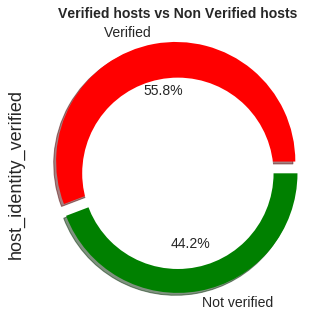

In [63]:
idata['host_identity_verified'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',fontsize=14,shadow=True,explode = (0.1,0.0),colors = ['red','green'])

plt.title('Verified hosts vs Non Verified hosts',weight = 'bold',fontsize = 14)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#### How many hosts has Wrong Location?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

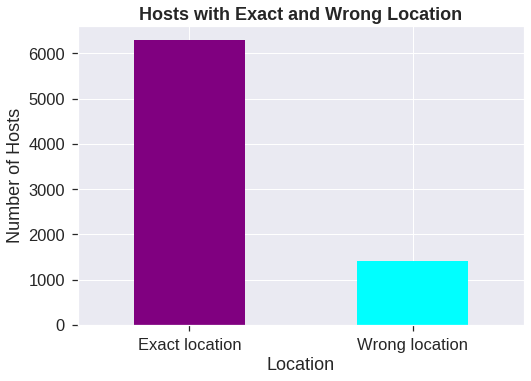

In [64]:
colors = ['#800080','#00FFFF']

idata['is_location_exact'].map({0:'Exact location',1:'Wrong location'}).value_counts().plot(kind = 'bar',colors =colors)
plt.title("Hosts with Exact and Wrong Location",weight = 'bold')
plt.xlabel('Location')
plt.ylabel('Number of Hosts')
plt.xticks(rotation = 0)

We have almost 1000 hosts with Wrong location.

#### Accomodates

In [65]:
acc = pd.DataFrame(idata['accommodates'].value_counts().reset_index())

In [66]:
colors = ['red','green','yellow','orange','blue','pink','gold','cyan']

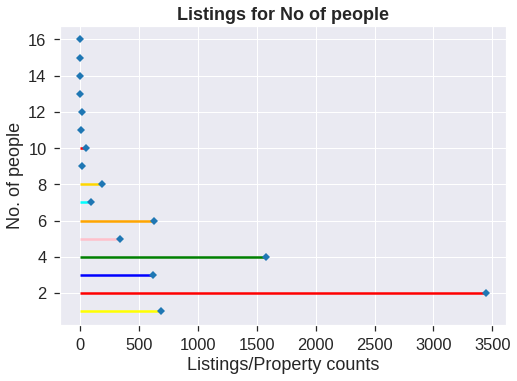

In [67]:
import seaborn as sns
plt.hlines(y=idata['accommodates'].value_counts().index, xmin= idata['accommodates'].value_counts().values[:: -1][0], xmax=idata['accommodates'].value_counts().values, color= colors)
plt.plot(data['accommodates'].value_counts(),acc['index'],"D")
#plt.yticks(my_range, ordered_df['group'])
plt.ylabel("No. of people")
plt.xlabel("Listings/Property counts")
plt.title('Listings for No of people',weight = 'bold')
plt.show()

#### Top 5 spaces that Hosts give?

Text(0, 0.5, 'Number of times Booked')

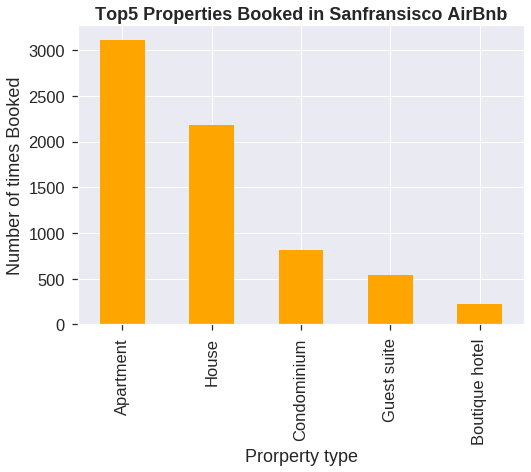

In [68]:
idata['property_type'].value_counts().head(5).plot(kind = 'bar',color = 'orange')
plt.title('Top5 Properties Booked in Sanfransisco AirBnb',weight  = 'bold')
plt.xlabel('Prorperty type')
plt.ylabel('Number of times Booked')

the above shown are the top 5 spaces that airbnb offering most.

#### Host and Superhost share in Different Room types

In [69]:
idata['room_type'].value_counts()

Entire home/apt    4690
Private room       2797
Shared room         216
Name: room_type, dtype: int64

Text(0, 0.5, 'count')

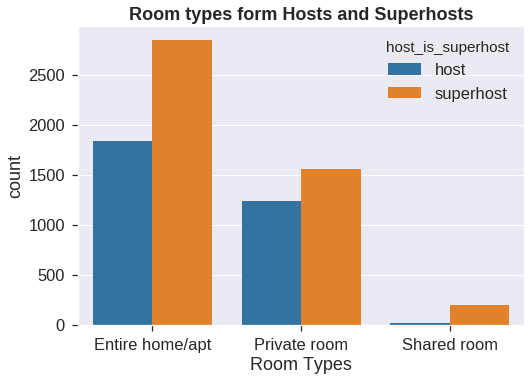

In [70]:
sns.countplot(idata['room_type'],hue = 'host_is_superhost',data = idata)
plt.title('Room types form Hosts and Superhosts',weight = 'bold')
plt.xlabel('Room Types')
plt.ylabel('count')

### Hosts and superhost effecting price

In [71]:
color = ['red','green']

Text(0.5, 1.0, 'Host / Super host effect on Price')

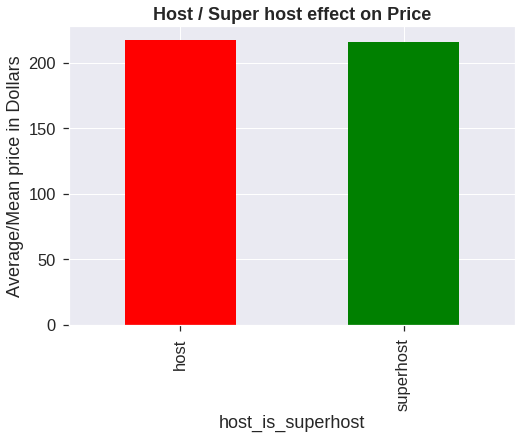

In [72]:
idata.groupby('host_is_superhost')['price'].mean().plot(kind = 'bar',color = color)
plt.ylabel('Average/Mean price in Dollars')
plt.title('Host / Super host effect on Price',weight = 'bold')

In [73]:
idata.groupby('host_is_superhost')['price'].mean()

host_is_superhost
host         217.400645
superhost    216.114925
Name: price, dtype: float64

#### Different Rooms available in Different property

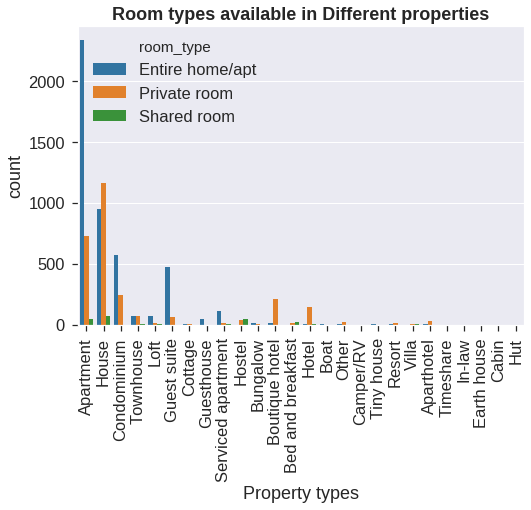

In [74]:
sns.countplot(idata['property_type'],hue = 'room_type',data = idata)
plt.xticks(rotation = 90)
plt.title('Room types available in Different properties',weight = 'bold')
plt.xlabel('Property types')
plt.ylabel('count')
plt.show()

#### Different propery types and their prices

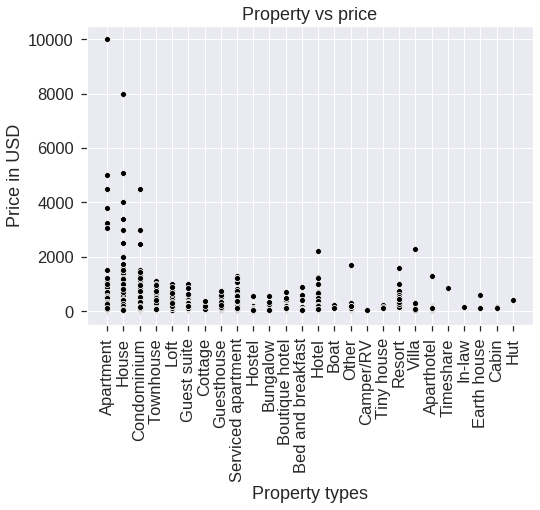

In [75]:
sns.scatterplot(idata['property_type'],idata['price'],color = 'black')
plt.xticks(rotation = 90)
plt.title('Property vs price')
plt.xlabel('Property types')
plt.ylabel('Price in USD')
plt.show()

#### spaces with Security deposit in the range of 1000 dollars

Text(0.5, 1.0, 'No of Listings with Different range of Security deposit ')

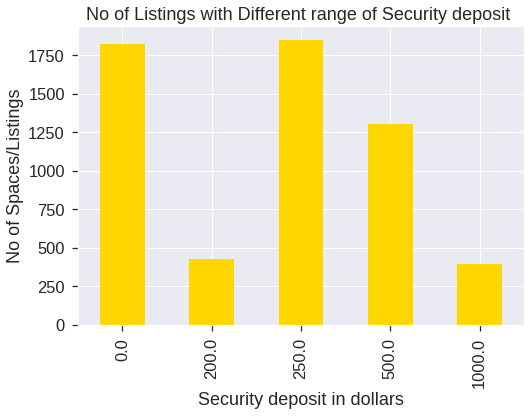

In [76]:
idata['security_deposit'].value_counts().head().sort_index(ascending = True).plot(kind = 'bar',color= 'gold')
plt.xlabel('Security deposit in dollars')
plt.ylabel('No of Spaces/Listings')
plt.title("No of Listings with Different range of Security deposit ")

#### Price ranges of Accommodates in Different rooms

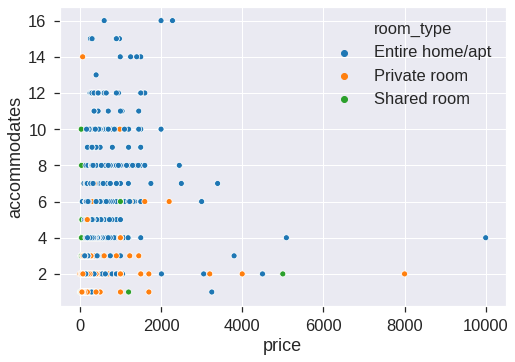

In [77]:
sns.scatterplot(x = idata['price'],y = idata['accommodates'],hue = idata['room_type'],data = idata)
#plt.xlim(0,5000)

relplot [here](https://seaborn.pydata.org/examples/scatter_bubbles.html)

#### Price ranges for accomodates in Different Room types

<Figure size 2880x2304 with 0 Axes>

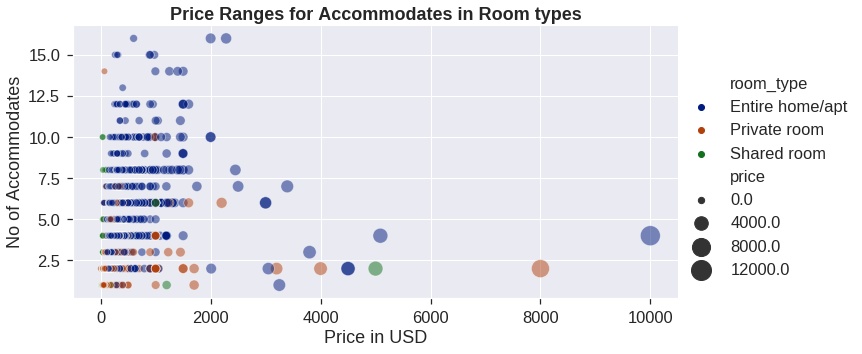

In [78]:
plt.figure(figsize= (40,32))
sns.relplot(x='price', y='accommodates', hue='room_type', size="price",
            sizes=(40, 400), alpha=.5, palette="dark", aspect = 2,data = idata)
plt.title('Price Ranges for Accommodates in Room types',weight = 'bold')
plt.xlabel('Price in USD')
plt.ylabel('No of Accommodates')
plt.show()

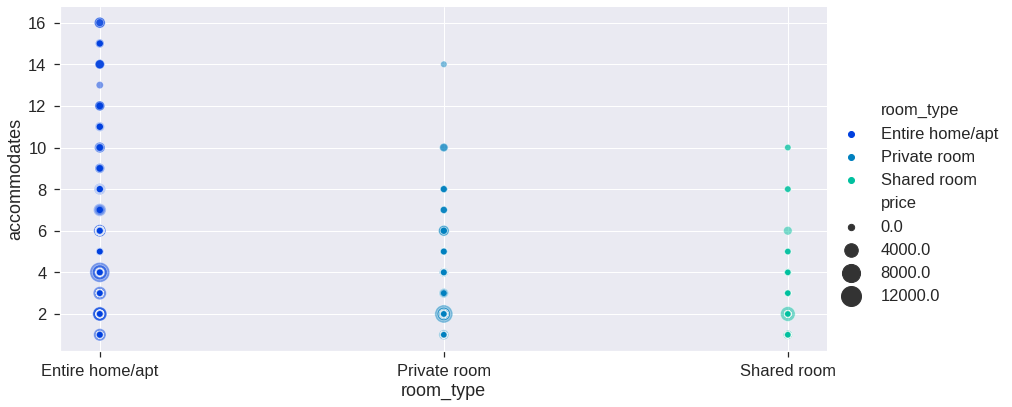

In [79]:
sns.relplot(x='room_type', y='accommodates', hue='room_type', size="price",
            sizes=(40, 400), alpha=.5, palette="winter",
            height=6,aspect = 2,data = idata)

#### Price ranges for Accommodates in different property_types

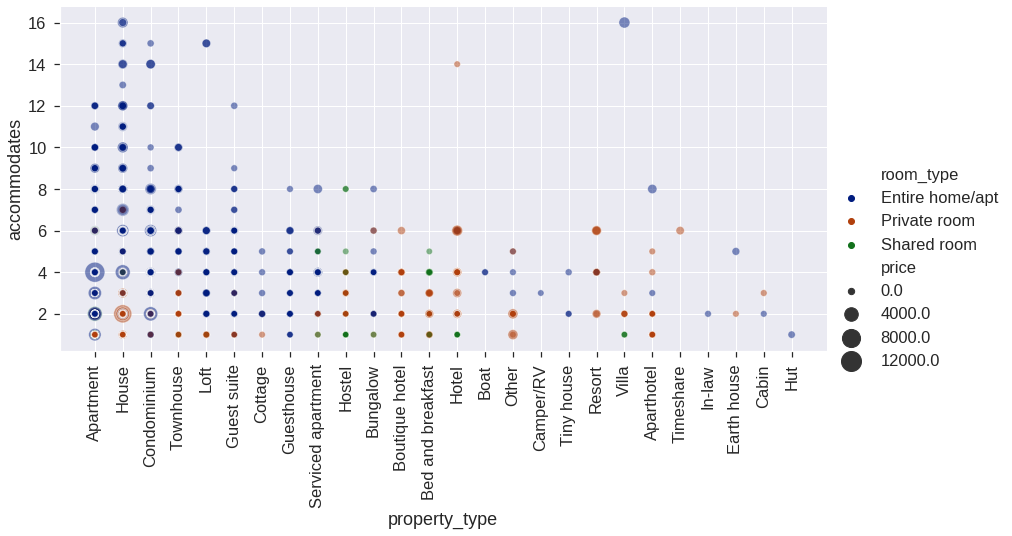

In [80]:
sns.relplot(x='property_type', y='accommodates', hue='room_type', size="price",
            sizes=(40, 400), alpha=.5, palette="dark",
            height=6,aspect = 2,data = idata)
plt.xticks(rotation = 90)
plt.show()

#### Host with highest ratings

In [81]:
idata[idata['number_of_reviews']== idata['number_of_reviews'].value_counts().index.max()]

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
352,545685,2676602,Su,2012-06-18,"San Francisco, California, United States",within a few hours,96.0,host,Richmond District,"['email', 'phone', 'reviews']",...,96.0,10.0,10.0,1,moderate,1,1,2,0,0


- Host name SU has highest no of reviews.

#### Host response time for Different property in Differnt price ranges

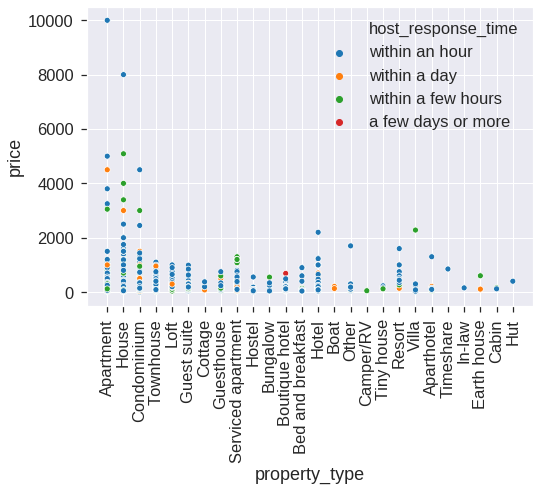

In [82]:
sns.scatterplot(idata['property_type'],idata['price'],hue = 'host_response_time',data = idata)
plt.xticks(rotation = 90)
plt.show()

#### Different ways to Verify host

In [83]:
idata['host_verifications'] = idata.host_verifications.astype(str)

In [84]:
idata['host_verifications'] = idata['host_verifications'].str.replace('[','')
idata['host_verifications'] = idata['host_verifications'].str.replace(']','')
idata['host_verifications'] = idata['host_verifications'].str.replace("'","")

In [85]:
verify_count = []
for i in idata.host_verifications:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        verify_count.append(t)

In [86]:
pd.Series(verify_count).value_counts()

phone                    7676
email                    7424
reviews                  6274
government_id            4451
jumio                    3714
offline_government_id    2835
kba                      2662
work_email               1965
selfie                   1643
facebook                 1493
identity_manual          1443
google                    520
manual_offline            110
manual_online              70
sent_id                    18
                           10
zhima_selfie                9
weibo                       4
dtype: int64

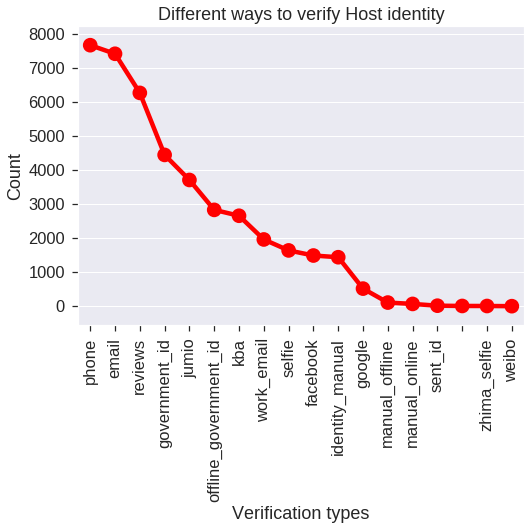

In [87]:
sns.pointplot(x= pd.Series(verify_count).value_counts().index, y= pd.Series(verify_count).value_counts().values,color = 'red', capsize=.2)
plt.xticks(rotation = 90)
plt.xlabel('Verification types')
plt.ylabel('Count')
plt.title('Different ways to verify Host identity')
plt.show()

#### Amenities provided to the guests

In [88]:
idata['amenities'] = idata['amenities'].astype(str)

In [89]:
idata['amenities'] = idata['amenities'].str.replace(' ','_')
idata['amenities'] = idata['amenities'].str.replace('"','')
idata['amenities'] = idata['amenities'].str.replace('{','')
#data['amenities'] = data['amenities'].str.replace(' ','_')


In [90]:
amenities_count = []
for i in data.amenities:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        amenities_count.append(t)

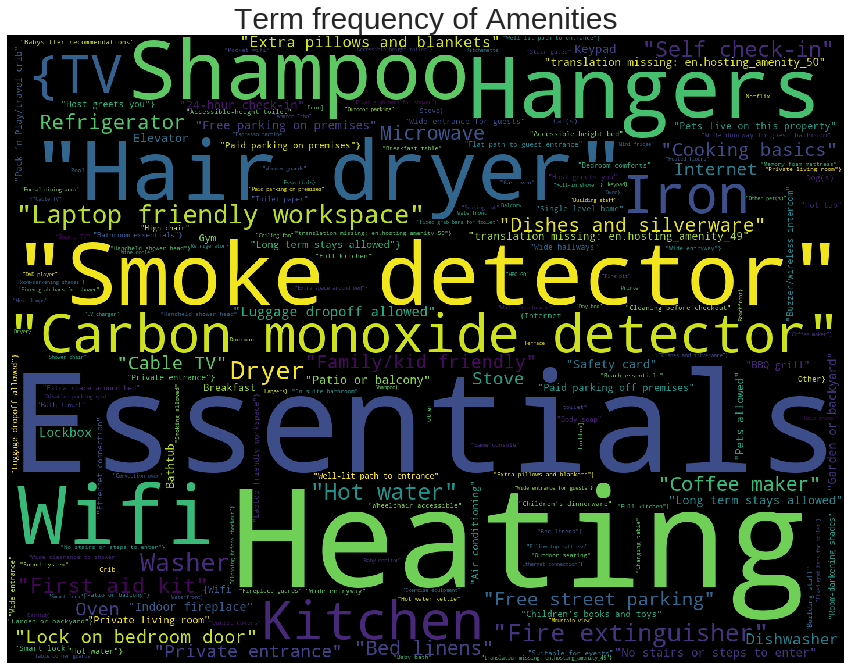

In [91]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(pd.Series(amenities_count).value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.title("Term frequency of Amenities",fontsize = 30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### No of beds for extra people in different price range

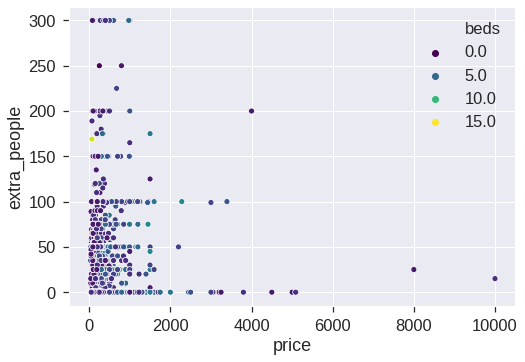

In [92]:
sns.scatterplot(idata['price'],idata['extra_people'],hue = idata['beds'],palette  ='viridis')

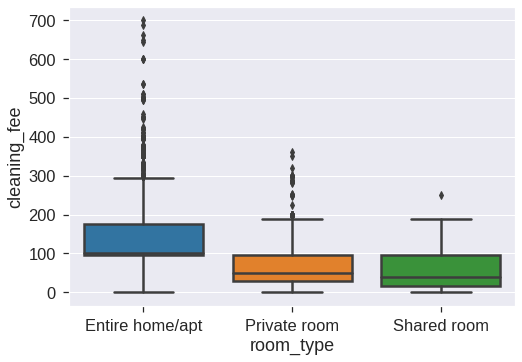

In [93]:
sns.boxplot(idata['room_type'], idata['cleaning_fee'])

#### do bed types makes difference in price?

Text(0.5, 1.0, 'Price ranges for Differnt Bed types')

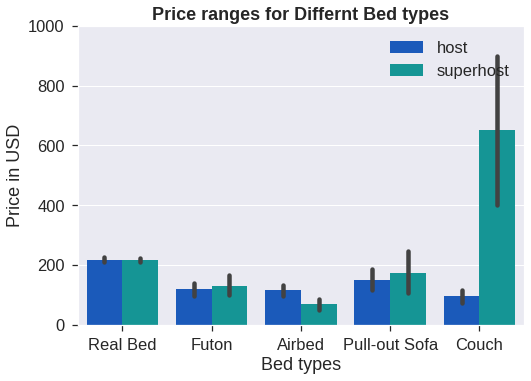

In [94]:
sns.barplot(idata['bed_type'],idata['price'],hue = 'host_is_superhost',data = idata,palette = 'winter')
plt.legend(loc = 'upper right')
plt.ylim(0,1000)
plt.xlabel('Bed types')
plt.ylabel('Price in USD')
plt.title('Price ranges for Differnt Bed types',weight = 'bold')

#### cleaning fee for different rooms of different price range

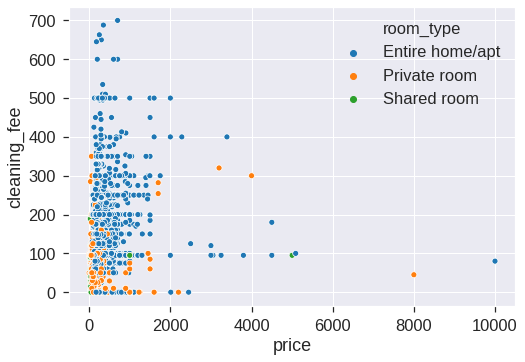

In [95]:
sns.scatterplot(idata['price'],idata['cleaning_fee'],hue = 'room_type', data  = idata)

#### What is the Avg price of every nighbourhood? which is highest?

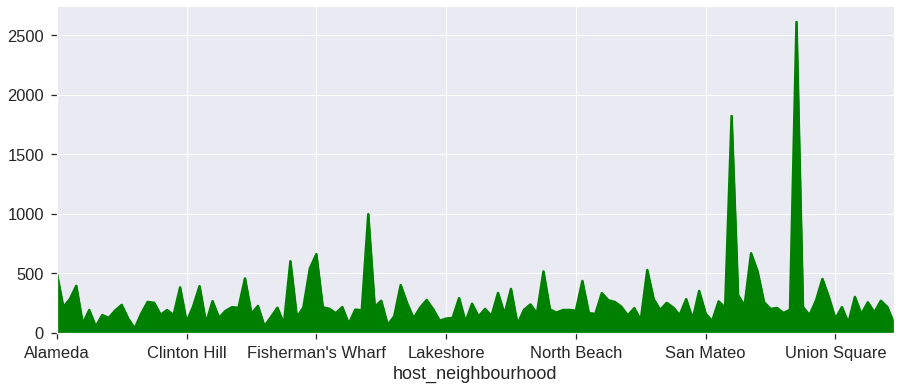

In [96]:
plt.figure(figsize = (15,6))
idata.groupby('host_neighbourhood')['price'].mean().plot(kind = 'area',color = 'green')

#### Top space in Top 20 neighbourhoods

In [97]:
topNSpaces = idata.groupby(['host_neighbourhood','property_type'])['price'].mean().sort_values(ascending = False)

In [98]:
topNSpaces = topNSpaces.reset_index()

In [99]:
topNSpaces = topNSpaces.drop_duplicates(subset='host_neighbourhood', keep = 'first')

In [100]:
topNSpaces.head()

,host_neighbourhood,property_type,price
0,Sunset District,Apartment,3363.666667
1,Sea Cliff,House,1820.000000
2,Fisherman's Wharf,Hotel,1724.500000
3,Mountain View,House,1400.000000
4,Pacific Heights,Resort,1300.000000


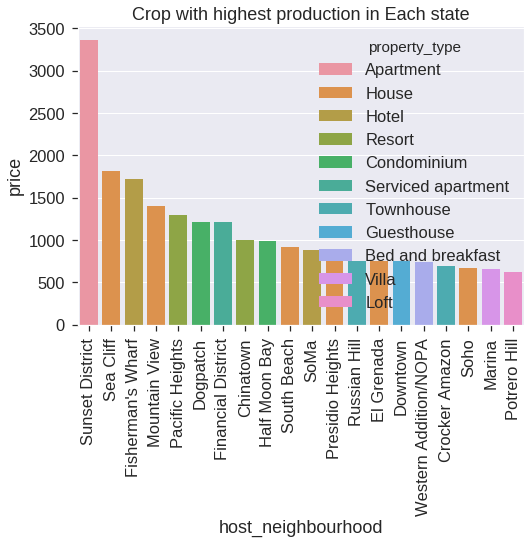

In [101]:
sns.barplot(x  = 'host_neighbourhood',y = 'price', data = topNSpaces.head(20),hue = 'property_type',dodge= False )
plt.xticks(rotation =90)
plt.title("Crop with highest production in Each state")
plt.show()

#### Property types vs accomodates

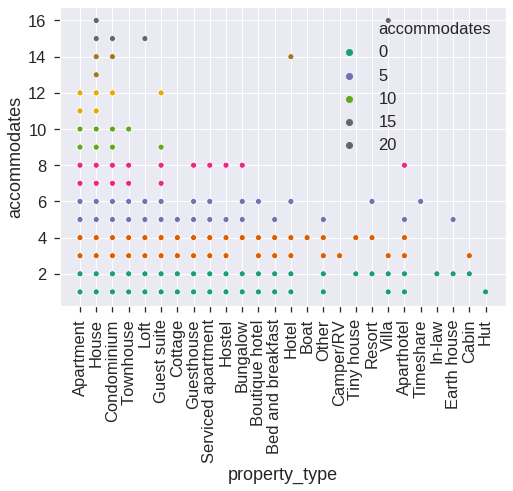

In [102]:
sns.scatterplot(x = 'property_type',y = 'accommodates',data = idata,hue = 'accommodates',palette  = 'Dark2')
plt.xticks(rotation = 90)
plt.show()

# Model

In [103]:
mdata = idata.copy()

In [104]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 0 to 7737
Data columns (total 43 columns):
id                                              7703 non-null int64
host_id                                         7703 non-null int64
host_name                                       7703 non-null object
host_since                                      7703 non-null datetime64[ns]
host_location                                   7703 non-null object
host_response_time                              7703 non-null object
host_response_rate                              7703 non-null float64
host_is_superhost                               7703 non-null object
host_neighbourhood                              7202 non-null object
host_verifications                              7703 non-null object
host_has_profile_pic                            7703 non-null uint8
host_identity_verified                          7703 non-null object
latitude                                        7703 non-nu

In [105]:
mdata.dropna(subset = ['host_since','host_name','host_location','host_neighbourhood','host_verifications','amenities'],inplace = True)

In [106]:
mdata = mdata.drop(['id','host_id','host_name','host_since','host_location','host_neighbourhood','host_verifications','latitude','longitude','amenities'],axis =1)

In [107]:
mdata['review_scores_value'] = mdata['review_scores_value'].fillna(mdata['review_scores_value'].median())
mdata['review_scores_rating'] = mdata['review_scores_rating'].fillna(mdata['review_scores_rating'].median())

In [108]:
#label encoding
from sklearn.preprocessing import LabelEncoder
var = ['host_response_time','host_is_superhost','host_identity_verified','property_type','room_type','bed_type','cancellation_policy']
for i in var:
    T = LabelEncoder()                 
    mdata[i] = T.fit_transform(mdata[i])

### VIF

In [109]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=mdata.drop('price',axis = 1).copy()
Xdata['intercept']=1
Xdata=Xdata
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values
vif

,Vif,Variables
0,1.736520,host_response_time
1,1.493174,host_response_rate
2,1.280273,host_is_superhost
3,1.051873,host_has_profile_pic
4,1.199411,host_identity_verified
5,1.607094,is_location_exact
6,1.193454,property_type
7,2.009029,room_type
8,4.735856,accommodates
9,1.484857,bathrooms


#### from vif , remove values with > 4

In [110]:
mdata = mdata.drop(['availability_60','availability_30','accommodates'],axis = 1)

In [111]:
mdata.sample(5)

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1726,1,80.0,1,0,1,0,1,0,1.0,2.0,...,100.0,10.0,10.0,1,1,1,1,3,0,0
2078,3,100.0,0,0,1,0,10,0,1.0,1.0,...,93.0,10.0,9.0,0,1,1,1,1,0,0
4293,3,100.0,0,0,1,0,14,0,2.0,4.0,...,100.0,10.0,10.0,0,1,1,1,4,0,0
5062,3,100.0,0,0,0,1,10,0,1.0,1.0,...,98.0,10.0,10.0,0,1,1,1,6,0,0
6104,3,100.0,1,0,0,0,14,1,2.0,1.0,...,99.0,10.0,10.0,0,1,1,1,0,3,0


# Compare

In [112]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7202 entries, 0 to 7737
Data columns (total 30 columns):
host_response_time                              7202 non-null int64
host_response_rate                              7202 non-null float64
host_is_superhost                               7202 non-null int64
host_has_profile_pic                            7202 non-null uint8
host_identity_verified                          7202 non-null int64
is_location_exact                               7202 non-null uint8
property_type                                   7202 non-null int64
room_type                                       7202 non-null int64
bathrooms                                       7202 non-null float64
bedrooms                                        7202 non-null float64
beds                                            7202 non-null float64
bed_type                                        7202 non-null int64
price                                           7202 non-null float64

#### General Model

In [113]:
X = mdata.drop('price',axis  =1)
y = mdata['price']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [116]:
lr.score(X_test, y_test)*100

-449213.5242736282

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_lr)

509247992.5772888

In [118]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

22566.52371494752

## Outlier removal

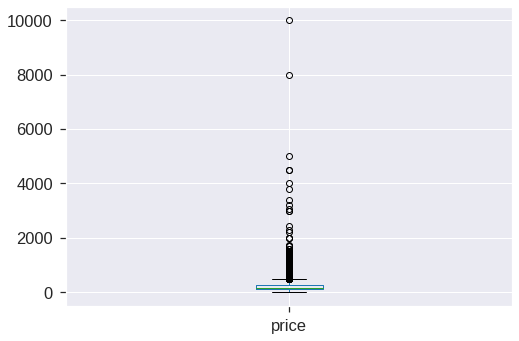

In [119]:
mdata['price'].plot(kind = 'box')

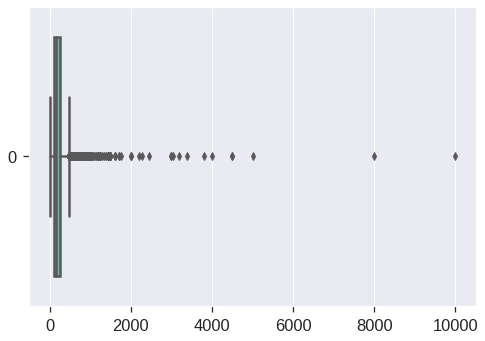

IQR 149.0
Upper 472.5
Lower 25.5


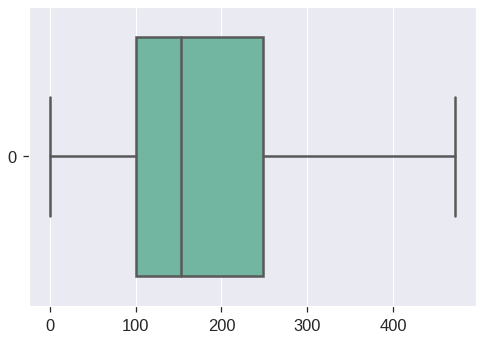

In [120]:
fig, axs = plt.subplots()
sns.boxplot(data= mdata['price'],orient='h',palette="Set2")
plt.show()
q75, q25 = np.percentile(mdata['price'], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
upper = q75 + (1.5*iqr)
print("Upper",upper)
lower = q75 - (1.5*iqr)
print("Lower",lower)
mdata['price'] = mdata['price'].clip(upper=upper)
fig, axs = plt.subplots()
sns.boxplot(data=mdata['price'],orient='h',palette="Set2")
plt.show()


In [121]:
X = mdata.drop('price',axis  =1)
y = mdata['price']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [124]:
lr.score(X_test,y_test)*100

-1427988.0381549136

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_lr)

203284409.6368513

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

14257.784176962818

In [127]:
#### 

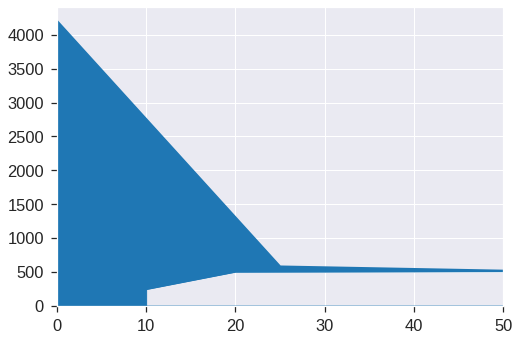

In [128]:
data['extra_people'].value_counts().head().plot(kind = 'area')

In [129]:
eprice  = pd.DataFrame(data['extra_people'].value_counts())

In [130]:
eprice = eprice.reset_index()

In [131]:
eprice = eprice.rename(columns = {'index':'price'})

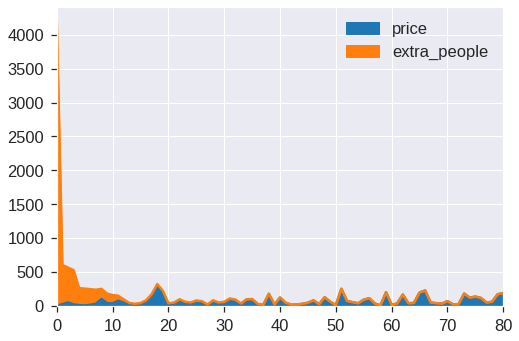

In [132]:
eprice.plot(kind = 'area')

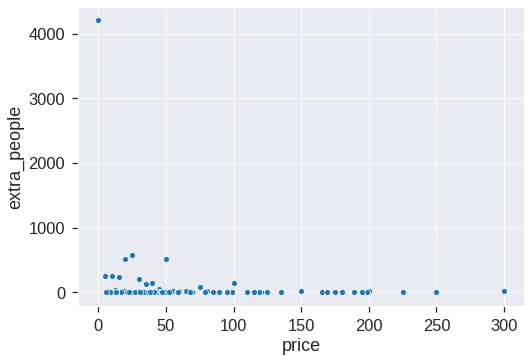

In [133]:
sns.scatterplot(x = 'price',y = 'extra_people',data = eprice)

In [134]:
eprice

,price,extra_people
0,0.0,4204
1,25.0,577
2,50.0,515
3,20.0,507
4,10.0,250
5,5.0,249
6,15.0,230
7,30.0,207
8,100.0,150
9,40.0,140


In [135]:
idata['extra_people']

0       25.0
1       20.0
2        0.0
3       12.0
4       12.0
        ... 
7733     0.0
7734    25.0
7735     0.0
7736     0.0
7737     0.0
Name: extra_people, Length: 7703, dtype: float64

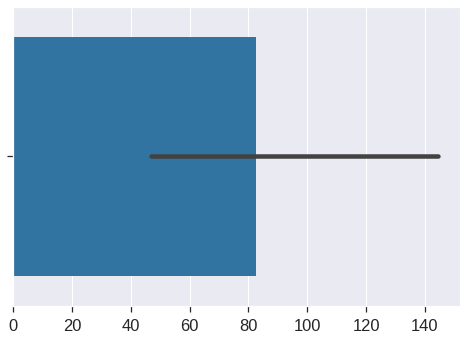

In [136]:
sns.barplot(eprice)